In [1]:
# Step 1 - Dataset Preparation
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Split the dataset into training (80%) and testing (20%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [3]:

# Normalize pixel values to be between 0 and 1
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

In [4]:
# Step 2 - Model Architecture and Training
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))


Epoch 1/10
750/750 [==============================] - 16s 21ms/step - loss: 0.3048 - accuracy: 0.9084 - val_loss: 0.0865 - val_accuracy: 0.9748
Epoch 2/10
750/750 [==============================] - 15s 20ms/step - loss: 0.1136 - accuracy: 0.9668 - val_loss: 0.0634 - val_accuracy: 0.9811
Epoch 3/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0887 - accuracy: 0.9734 - val_loss: 0.0569 - val_accuracy: 0.9833
Epoch 4/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0706 - accuracy: 0.9785 - val_loss: 0.0502 - val_accuracy: 0.9854
Epoch 5/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0590 - accuracy: 0.9820 - val_loss: 0.0492 - val_accuracy: 0.9857
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0526 - accuracy: 0.9833 - val_loss: 0.0451 - val_accuracy: 0.9884
Epoch 7/10
750/750 [==============================] - 17s 23ms/step - loss: 0.0453 - accuracy: 0.9862 - val_loss: 0.0417 - val_accuracy:

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0385 - accuracy: 0.9877
Test accuracy: 0.9876999855041504


In [14]:
# Using VGG19 for Transfer Learning with MNIST
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
import cv2

In [15]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Resize images to (48, 48) and simulate RGB channels
x_train = [cv2.cvtColor(cv2.resize(image, (48, 48)), cv2.COLOR_GRAY2RGB) for image in x_train]
x_test = [cv2.cvtColor(cv2.resize(image, (48, 48)), cv2.COLOR_GRAY2RGB) for image in x_test]

In [16]:
# Convert to NumPy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

# Split the dataset into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [17]:
# Preprocess pixel values to be in the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [18]:
# Load the pre-trained VGG19 model (without the top classification layer)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze the convolutional layers to prevent them from being updated during training
for layer in base_model.layers:
    layer.trainable = False

In [20]:
model = Model(inputs=base_model.input, outputs=output)

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [25]:
# Train the model
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/3
750/750 [==============================] - 328s 437ms/step - loss: 0.1450 - accuracy: 0.9559 - val_loss: 0.0988 - val_accuracy: 0.9707
Epoch 2/3
750/750 [==============================] - 332s 443ms/step - loss: 0.1342 - accuracy: 0.9589 - val_loss: 0.0962 - val_accuracy: 0.9703
Epoch 3/3
750/750 [==============================] - 352s 469ms/step - loss: 0.1269 - accuracy: 0.9616 - val_loss: 0.0873 - val_accuracy: 0.9718


In [26]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 89s 284ms/step - loss: 0.0851 - accuracy: 0.9719
Test accuracy: 0.9718999862670898


In [27]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [29]:
# Evaluate CNN model
cnn_predictions = model.predict(x_test)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)
cnn_true_labels = y_test

313/313 [==============================] - 89s 281ms/step


In [30]:
# Evaluate Transfer Learning model
tl_predictions = model.predict(x_test)
tl_predicted_labels = np.argmax(tl_predictions, axis=1)
tl_true_labels = y_test

313/313 [==============================] - 88s 281ms/step


In [31]:
# Calculate evaluation metrics
cnn_report = classification_report(cnn_true_labels, cnn_predicted_labels)
tl_report = classification_report(tl_true_labels, tl_predicted_labels)

# Print classification reports
print("CNN Model:")
print(cnn_report)
print("\nTransfer Learning Model (VGG19):")
print(tl_report)

CNN Model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.97      0.96       892
           6       0.98      0.97      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.97      0.96      0.97       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000


Transfer Learning Model (VGG19):
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97

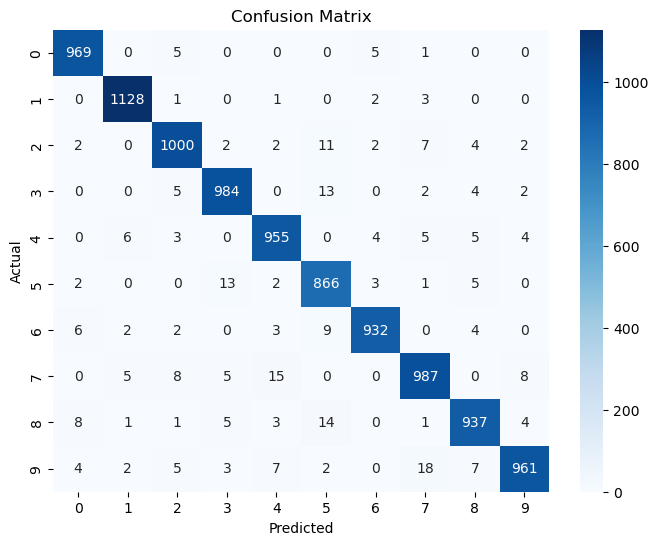

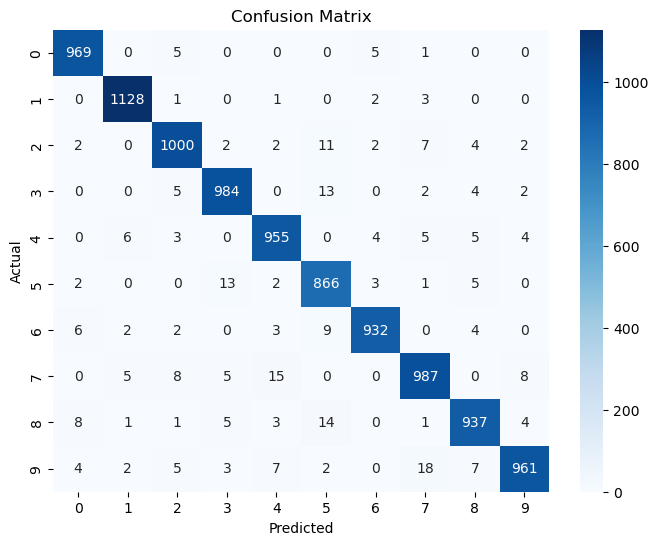

In [32]:
# Plot confusion matrices
plot_confusion_matrix(cnn_true_labels, cnn_predicted_labels, labels=np.arange(10))
plot_confusion_matrix(tl_true_labels, tl_predicted_labels, labels=np.arange(10))

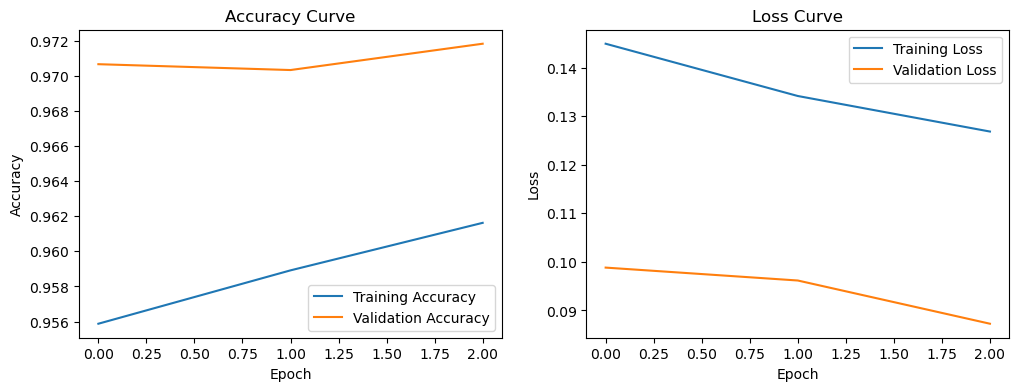

In [33]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.show()
